In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing Datasets (all)
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

In [3]:
# # show all rows and columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

#### Defined Functions

In [4]:
def eda(dataframe):
    """Runs basic EDA on dataframe."""
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe describe \n", dataframe.describe(), '\n')
    print("dataframe describe \n", dataframe.describe(exclude=np.number).T, '\n')
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("duplicate values \n", dataframe.duplicated().sum(), '\n')
    print("dataframe columns \n", dataframe.columns, '\n')
    
    #check if column is unique
    for i in dataframe.columns:
        print('{} is unique: {}'.format(i, dataframe[i].is_unique))

In [5]:
def split_date (data):
    """split into year and month"""
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    return

In [6]:
def replace_val(df, column, old_value, new_value):
    """ for replacing values in columns"""
    df[column] = df[column].replace({old_value: new_value})

In [7]:
def replace_median(df, column):
    """ replace NaN values with median"""
    df[column].fillna((df[column].median()), inplace=True)

# 1.0 Cleaning

### <span style='background :yellow' > 1.1 Train Dataset </span>

In [8]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [9]:
#view EDA
eda(train)

dataframe shape 
 (10506, 12) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

dataframe describe 
               Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.95

In [10]:
print(train['Date'].min())
print(train['Date'].max())

2007-05-29
2013-09-26


In [11]:
train[train.duplicated()].head()

# duplicates are traps with excess of 50 mosquitoes, to be processed later

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0




<div class="alert alert-block alert-info">
    
<b>Train Dataset:</b>
    
- 12 columns, 10506 rows
- extra columns: 'NumMosquitos' and 'WnvPresent'
- no nulls
- 813 duplicates
- Date needs to be changed to datetime format
- data ranges from 2007-05-29 to 2013-09-26
    

</div>

***

### <span style='background :yellow' > 1.2 Test Dataset </span>

In [12]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [13]:
#view EDA
eda(test)

dataframe shape 
 (116293, 11) 

dataframe types 
 Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object 

dataframe describe 
                   Id          Block       Latitude      Longitude  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      41.131100      41.849389     -87.693658   
std     33571.041765      24.864726       0.106593       0.080699   
min         1.000000      10.000000      41.644612     -87.930995   
25%     29074.000000      18.000000      41.753411     -87.750938   
50%     58147.000000      39.000000      41.862292     -87.694991   
75%     87220.000000      61.000000      41.951866     

In [14]:
print(train['Date'].min())
print(train['Date'].max())

2007-05-29
2013-09-26


***



<div class="alert alert-block alert-info">
    
    
<b>Test Dataset:</b> 
    
- 11 columns, 116293 rows 
- extra columns: 'Id'
- no nulls
- no duplicates
- Date needs to be changed to datetime format
- data ranges from 2007-05-29 to 2013-09-26

    
<b>Initial thoughts:</b> 
There are no mosquito number infomation in our test set so our predictions have to be based on weather, location, time, and spraying. We might need to do predict the amount of mosquitoes in order to predict the amount of WNV?

Train duplicates might be cause by mosquitoes in trap exceeding 50 counts, this will need to be processed later. 
Train and test data ranges in the same period
    
</div>



***

### <span style='background :yellow' > 1.3 Weather Dataset </span>


In [15]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [16]:
#view EDA
eda(weather)

dataframe shape 
 (2944, 22) 

dataframe types 
 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

dataframe describe 
            Station         Tmax         Tmin     DewPoint  ResultSpeed  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    76.166101    57.810462    53.457880     6.960666   
std       0.500085    11.461970    10.381939    10.675181     3.587527   
min       1.000000    41.000000    29.000000    22.000000     0.100000   
25%       1.000000    69.000000    50.

In [17]:
# checking for columns containing M or T as missing values

check_col = ['Tavg', 'Depart','WetBulb','Heat','Cool',
             'Sunrise','Sunset','Depth','Water1','SnowFall',
            'PrecipTotal','StnPressure','SeaLevel','AvgSpeed']

print(weather.shape)
print('')

for col in weather[check_col]:
    station_1 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==1)])
    print(f"{col}(station 1): {str(station_1)} missing values")
    
    station_2 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==2)])
    print(f"{col}(station 2): {str(station_2)} missing values")
    print('**************')

(2944, 22)

Tavg(station 1): 0 missing values
Tavg(station 2): 11 missing values
**************
Depart(station 1): 1271 missing values
Depart(station 2): 1472 missing values
**************
WetBulb(station 1): 3 missing values
WetBulb(station 2): 1 missing values
**************
Heat(station 1): 0 missing values
Heat(station 2): 11 missing values
**************
Cool(station 1): 1096 missing values
Cool(station 2): 1021 missing values
**************
Sunrise(station 1): 0 missing values
Sunrise(station 2): 1472 missing values
**************
Sunset(station 1): 0 missing values
Sunset(station 2): 1472 missing values
**************
Depth(station 1): 0 missing values
Depth(station 2): 1472 missing values
**************
Water1(station 1): 1472 missing values
Water1(station 2): 1472 missing values
**************
SnowFall(station 1): 1472 missing values
SnowFall(station 2): 1472 missing values
**************
PrecipTotal(station 1): 1472 missing values
PrecipTotal(station 2): 1472 missing values
*

In [18]:
# dropping unwanted columns
droplist = ['Depart', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'Depth',
       'Water1', 'SnowFall', 'CodeSum']
weather.drop(droplist, axis = 1, inplace= True)

In [19]:
# replace M to NaN
weather = weather.replace('M', np.nan)
weather = weather.replace('-', np.nan)

#Trace value < 0.1
replace_val(weather, 'PrecipTotal', '  T' , 0.005)

# Tavg to be for average of Tmax and Tmin
weather['Tavg'] = round((weather['Tmax'] + weather['Tmin'])/2+0.1)

In [20]:
# change column types
weather['Tavg'] = weather['Tavg'].astype(float)
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)
weather['StnPressure'] = weather['StnPressure'].astype(float)
weather['SeaLevel'] = weather['SeaLevel'].astype(float)
weather['AvgSpeed'] = weather['AvgSpeed'].astype(float)
weather['WetBulb'] = weather['WetBulb'].astype(float)

In [21]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,42,47.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,42,47.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,40,48.0,0.0,29.39,30.12,11.7,7,11.9


In [22]:
# replacing nan with median

replace_median(weather, 'PrecipTotal')
replace_median(weather, 'StnPressure')
replace_median(weather, 'SeaLevel')
replace_median(weather, 'AvgSpeed')
replace_median(weather, 'WetBulb')

In [23]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [24]:
# Split station 1 and 2 and join horizontally
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]

# add long, lat
weather_stn1 ['Latitude'] = 41.995
weather_stn1 ['Longitude'] = -87.933
weather_stn2 ['Latitude'] = 41.786
weather_stn2 ['Longitude'] = -87.752

# drop station column
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)

#join df
weather = weather_stn1.merge(weather_stn2, on='Date')

#change column names
weather.columns = ['Date', 'Tmax_1', 'Tmin_1', 'Tavg_1', 'DewPoint_1', 'WetBulb_1',
       'PrecipTotal_1', 'StnPressure_1', 'SeaLevel_1',
       'ResultSpeed_1', 'ResultDir_1', 'AvgSpeed_1', 'Latitude_1',
       'Longitude_1', 'Tmax_2', 'Tmin_2', 'Tavg_2', 'DewPoint_2', 'WetBulb_2',
       'PrecipTotal_2', 'StnPressure_2', 'SeaLevel_2',
       'ResultSpeed_2', 'ResultDir_2', 'AvgSpeed_2', 'Latitude_2',
       'Longitude_2']


In [25]:
weather.head()

,Date,Tmax_1,Tmin_1,Tavg_1,DewPoint_1,WetBulb_1,PrecipTotal_1,StnPressure_1,SeaLevel_1,ResultSpeed_1,...,DewPoint_2,WetBulb_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2,Latitude_2,Longitude_2
0,2007-05-01,83,50,67.0,51,56.0,0.000,29.10,29.82,1.7,...,51,57.0,0.000,29.18,29.82,2.7,25,9.6,41.786,-87.752
1,2007-05-02,59,42,51.0,42,47.0,0.000,29.38,30.09,13.0,...,42,47.0,0.000,29.44,30.08,13.3,2,13.4,41.786,-87.752
2,2007-05-03,66,46,56.0,40,48.0,0.000,29.39,30.12,11.7,...,40,50.0,0.000,29.46,30.12,12.9,6,13.2,41.786,-87.752
3,2007-05-04,66,49,58.0,41,50.0,0.005,29.31,30.05,10.4,...,42,50.0,0.000,29.36,30.04,10.1,7,10.4,41.786,-87.752
4,2007-05-05,66,53,60.0,38,49.0,0.005,29.40,30.10,11.7,...,39,50.0,0.005,29.46,30.09,11.2,7,11.5,41.786,-87.752


In [26]:
print(weather['Date'].min())
print(weather['Date'].max())

2007-05-01
2014-10-31


<div class="alert alert-block alert-info">

<b>Weather Dataset:</b><br>
- 22 columns, 2944 rows
- no null values
- no duplicate values
- date range : 2007-05-01 to 2014-10-31
- Dataset is riddled with "M" for missing, "T" for trace data, "-" for some data from station 2.

<br>
    
><u>Columns Dropped:</u>  
>1. Depart - difference from 30 year avg
>2. Heat - avg temp degrees above 65 F - can be calculated
>3. Cool - avg temp degrees below 65 F  - can be calculated
>4. Sunrise - calculated sunrise - not needed
>5. Sunset - calculated sunset - not needed
>6. Depth - 0 or Missing
>7. Water1 - all Missing
>8. SnowFall - Missing or 0, only 1 value of 0.01
>9. CodeSum - too little inputs to be meaningful 

><u>Imputation and Additional Columns:</u>
>1. Tavg: M = round up((tmax + tmin)/2) **
>2. PrecipTotal: T = 0.005
>3. PrecipTotal M = median
>4. StnPressure M = median
>5. SeaLevel M = median
>6. AvgSpeed M = median
>7. added 'Latitude' column
>8. added 'Longitude' column
    
</div>

***

### <span style='background :yellow' > 1.4 Spray Dataset </span>

In [27]:
# view spray
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [28]:
#view EDA
eda(spray)

dataframe shape 
 (14835, 4) 

dataframe types 
 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

dataframe describe 
            Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727 

dataframe describe 
       count unique         top  freq
Date  14835     10  2013-08-15  2668
Time  14251   8583  7:44:32 PM   541 

missing values 
 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

duplicate values 
 541 

dataframe columns 
 Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object') 

Date is unique: False
Time is unique: False
Latitude is unique: False
Longitude is unique: False


In [29]:
# changes time to datetime format
spray['Time'] = pd.to_datetime(spray['Time'], infer_datetime_format=True)

# changes time to the hour of the day
spray['Time'] = spray['Time'].dt.hour

In [30]:
# view duplicates
spray[spray.duplicated()].head(10)

,Date,Time,Latitude,Longitude
485,2011-09-07,19.0,41.983917,-87.793088
490,2011-09-07,19.0,41.986460,-87.794225
491,2011-09-07,19.0,41.986460,-87.794225
492,2011-09-07,19.0,41.986460,-87.794225
493,2011-09-07,19.0,41.986460,-87.794225
494,2011-09-07,19.0,41.986460,-87.794225
495,2011-09-07,19.0,41.986460,-87.794225
496,2011-09-07,19.0,41.986460,-87.794225
497,2011-09-07,19.0,41.986460,-87.794225
498,2011-09-07,19.0,41.986460,-87.794225


In [31]:
# seems like real duplicates, will drop these
spray.drop_duplicates(inplace=True)

In [32]:
spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [33]:
print(spray['Date'].min())
print(spray['Date'].max())

2011-08-29
2013-09-05


In [34]:
# check null values
spray[spray.isnull()].tail()

,Date,Time,Latitude,Longitude
14830,NaN,NaN,NaN,NaN
14831,NaN,NaN,NaN,NaN
14832,NaN,NaN,NaN,NaN
14833,NaN,NaN,NaN,NaN
14834,NaN,NaN,NaN,NaN


In [35]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,18.0,42.391623,-88.089163
1,2011-08-29,18.0,42.391348,-88.089163
2,2011-08-29,18.0,42.391022,-88.089157
3,2011-08-29,18.0,42.390637,-88.089158
4,2011-08-29,18.0,42.390410,-88.088858


<div class="alert alert-block alert-info">

<b>Spray Dataset:</b>
- 4 columns, 14835 rows
- 541 duplicated values dropped
- 584 null rows dropped
- 'Time' changed to reflect hour in the day instead
- date range : 2011-08-29 to 2013-09-05
- unique date counts : 10 (i.e 10 spray dates in date range)

</div>

***

### 1.5 Edit formats

In [36]:
# Map the lowering function to all column names
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)
weather.columns = map(str.lower, weather.columns)
spray.columns = map(str.lower, spray.columns)

In [37]:
# changes date to datetime formats
train['date'] = pd.to_datetime(train['date'], infer_datetime_format=True)
test['date'] = pd.to_datetime(test['date'], infer_datetime_format=True)
weather['date'] = pd.to_datetime(weather['date'], infer_datetime_format=True)
spray['date'] = pd.to_datetime(spray['date'], infer_datetime_format=True)

In [38]:
#Save cleaned dataframe to csv
train.to_csv('../assets/train_cleaned.csv', index=False)
test.to_csv('../assets/test_cleaned.csv', index=False)
weather.to_csv('../assets/weather_cleaned.csv', index=False)
spray.to_csv('../assets/spray_cleaned.csv', index=False)

***

# 2.0 EDA and Feature Engineering

## <span style='background :yellow' > 2.1 Train Dataset</span>

In [39]:
train['species'].value_counts(normalize = True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: species, dtype: float64

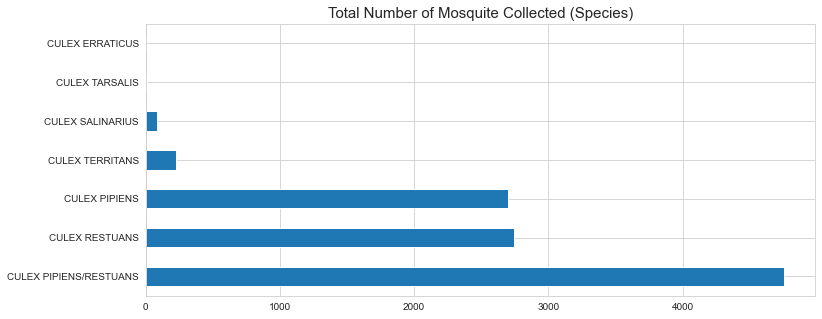

In [40]:
train['species'].value_counts().plot(kind = 'barh', figsize=(12,5))
plt.title('Total Number of Mosquite Collected (Species)', fontsize=15);

In [41]:
# species and WNV count df
species_wnv = pd.DataFrame(train['species'].value_counts()).reset_index()

species_wnv = pd.merge(species_wnv, pd.DataFrame(train[train['wnvpresent']==1]['species'].value_counts()).reset_index(), how='left', on='index')

species_wnv.columns = ['species', 'num_observations', 'obs_w_wnv']

In [42]:
species_wnv

,species,num_observations,obs_w_wnv
0,CULEX PIPIENS/RESTUANS,4752,262.0
1,CULEX RESTUANS,2740,49.0
2,CULEX PIPIENS,2699,240.0
3,CULEX TERRITANS,222,NaN
4,CULEX SALINARIUS,86,NaN
5,CULEX TARSALIS,6,NaN
6,CULEX ERRATICUS,1,NaN


In [43]:
train.wnvpresent.value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

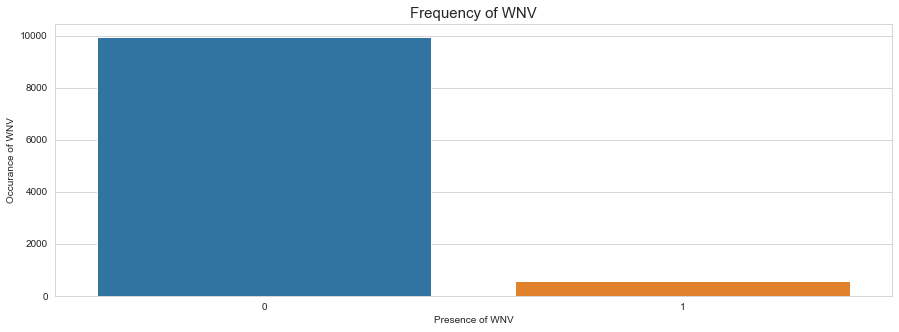

In [44]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="wnvpresent", data=train)
plt.title('Frequency of WNV', fontsize=15)
plt.xlabel('Presence of WNV',fontsize=10)
plt.ylabel('Occurance of WNV',fontsize=10);

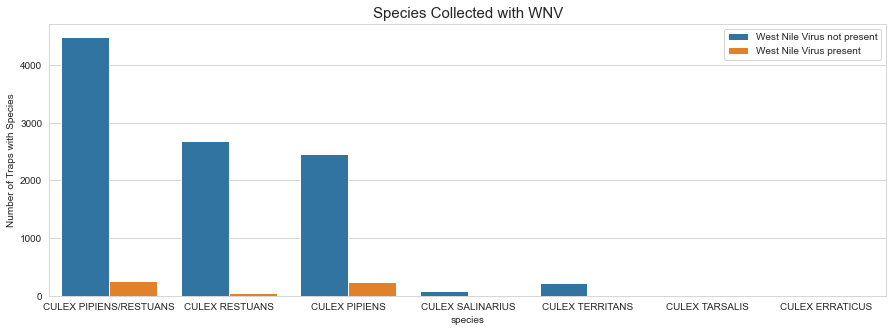

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x='species', hue='wnvpresent', data=train)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.title('Species Collected with WNV', fontsize=15);

In [46]:
train[train['wnvpresent'] == 1]['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

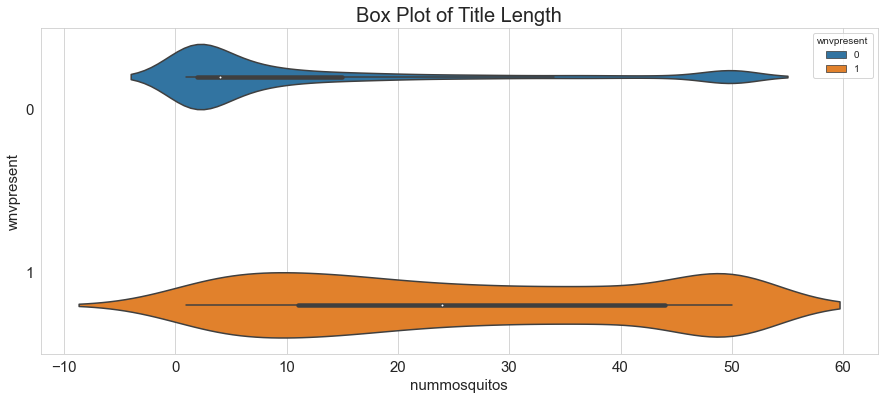

In [47]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.violinplot(y= 'wnvpresent', 
                    x='nummosquitos',
                    data=train, 
                    orient='h', 
                    hue='wnvpresent')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("nummosquitos",fontsize=15)
ax.set_ylabel("wnvpresent",fontsize=15)
ax.tick_params(labelsize=15)

<div class="alert alert-block alert-warning">

<b>To do:</b>

- comment on outlier, reason to keep 
- Assumption: 
- normal boxplot

</div>


In [49]:
# Split dates into separate column 
split_date(train)
split_date(test)
split_date(weather)
split_date(spray)

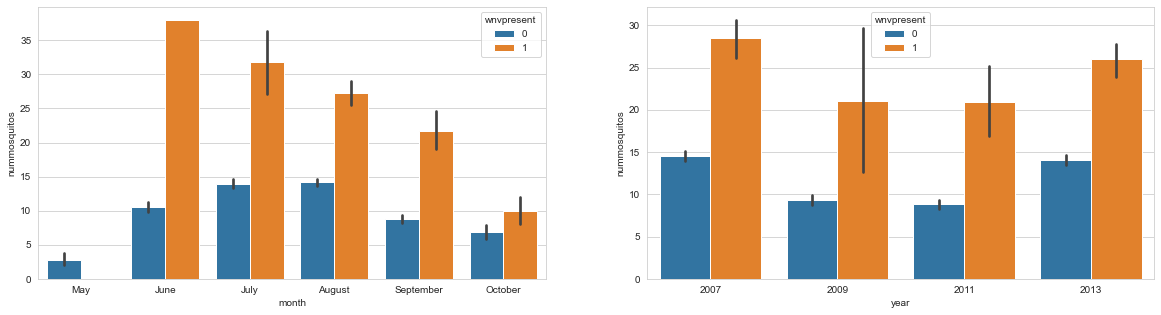

In [50]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
_=sns.barplot('month','nummosquitos',data=train,hue='wnvpresent')
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.subplot(1,2,2)
sns.barplot('year','nummosquitos',data=train,hue='wnvpresent');

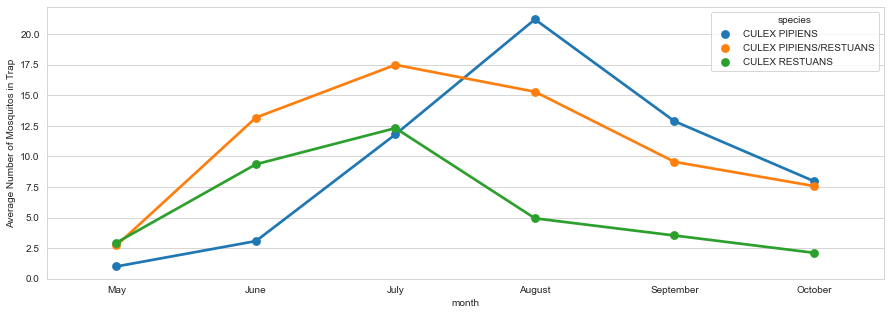

In [51]:
# add title
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="nummosquitos", hue='species', data=train[train['species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['month', 'species'], as_index=False)['nummosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap');

In [52]:
# combining mosquitoes maxed at 50, total mosquitoes
train[train.nummosquitos == 50]
train.groupby(['date', 'trap', 'species'], as_index=False)['nummosquitos'].sum().sort_values('nummosquitos', ascending=False).head(15)

,date,trap,species,nummosquitos
1450,2007-08-16,T115,CULEX PIPIENS,2532
565,2007-07-25,T115,CULEX PIPIENS,2356
1901,2007-08-28,T115,CULEX PIPIENS,2207
1196,2007-08-08,T138,CULEX PIPIENS,1658
2055,2007-09-05,T115,CULEX PIPIENS,1648
1680,2007-08-22,T115,CULEX PIPIENS,1554
847,2007-08-01,T115,CULEX PIPIENS,1543
3197,2009-06-22,T900,CULEX PIPIENS/RESTUANS,1520
1191,2007-08-08,T115,CULEX PIPIENS,1310
1686,2007-08-22,T138,CULEX PIPIENS,1054


In [53]:
#merging total mosquitoes with train 
train = pd.merge(train, train.groupby(['date', 'trap', 'species'], as_index=False)['nummosquitos'].sum(), how='left', on=['date', 'trap', 'species'])
train.columns = ['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'total_mos']

In [54]:
rate = train.groupby(['addressnumberandstreet', 'trap'], as_index=False)['wnvpresent', 'nummosquitos'].sum().sort_values('wnvpresent')

In [55]:
rate.tail()

,addressnumberandstreet,trap,wnvpresent,nummosquitos
79,"4600 N MILWAUKEE AVE, Chicago, IL",T003,14,1346
4,"1000 S STONY ISLAND AVE, Chicago, IL",T138,16,9936
72,"4100 N OAK PARK AVE, Chicago, IL",T002,18,3710
18,"1200 S DOTY AVE, Chicago, IL",T115,41,21668
7,"1000 W OHARE AIRPORT, Chicago, IL",T900,66,15386


In [56]:
rate['rate_virus'] = rate['wnvpresent']/rate['nummosquitos']

In [57]:
rate.sort_values('wnvpresent', ascending=False).head(10)

,addressnumberandstreet,trap,wnvpresent,nummosquitos,rate_virus
7,"1000 W OHARE AIRPORT, Chicago, IL",T900,66,15386,0.004290
18,"1200 S DOTY AVE, Chicago, IL",T115,41,21668,0.001892
72,"4100 N OAK PARK AVE, Chicago, IL",T002,18,3710,0.004852
4,"1000 S STONY ISLAND AVE, Chicago, IL",T138,16,9936,0.001610
79,"4600 N MILWAUKEE AVE, Chicago, IL",T003,14,1346,0.010401
128,"8200 S KOSTNER AVE, Chicago, IL",T225,11,2014,0.005462
60,"3600 N PITTSBURGH AVE, Chicago, IL",T011,11,1311,0.008391
45,"2400 E 105TH ST, Chicago, IL",T128,11,3315,0.003318
115,"7000 N MOSELL AVE, Chicago, IL",T008,10,2668,0.003748
8,"1000 W OHARE, Chicago, IL",T903,10,2327,0.004297


In [58]:
rate.sort_values('rate_virus', ascending=False).head(25)

,addressnumberandstreet,trap,wnvpresent,nummosquitos,rate_virus
99,"6000 W ROSCOE ST, Chicago, IL",T005,2,50,0.040000
97,"6000 N AVONDALE AVE, Chicago, IL",T006,4,107,0.037383
109,"6500 N OAK PARK AVE, Chicago, IL",T143,6,230,0.026087
123,"7900 W FOSTER AVE, Chicago, IL",T015,4,169,0.023669
125,"8100 E 91ST ST, Chicago, IL",T107,2,86,0.023256
89,"5200 S NORDICA, Chicago, IL",T070,2,90,0.022222
75,"4200 W 31ST ST, Chicago, IL",T036,1,52,0.019231
69,"4000 N AUSTIN AVE, Chicago, IL",T142,1,58,0.017241
111,"6600 S KILPATRICK AVE, Chicago, IL",T156,1,61,0.016393
71,"4000 S DEARBORN ST, Chicago, IL",T081,3,207,0.014493


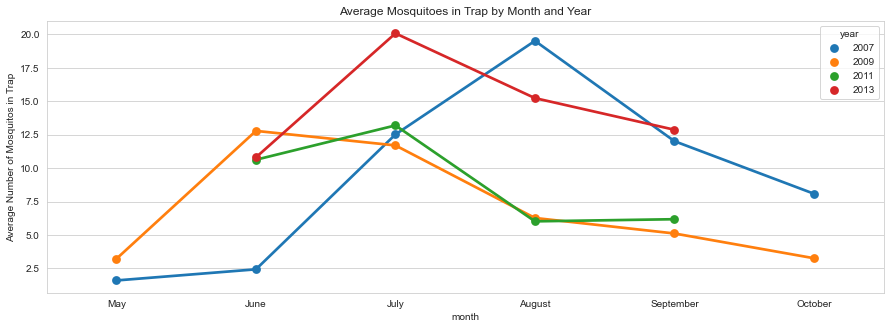

In [59]:
# plot Average Mosquitoes in Trap by Month and Year
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="nummosquitos", hue="year", data=train.groupby(['year', 'month'], as_index=False)['nummosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
plt.title('Average Mosquitoes in Trap by Month and Year');

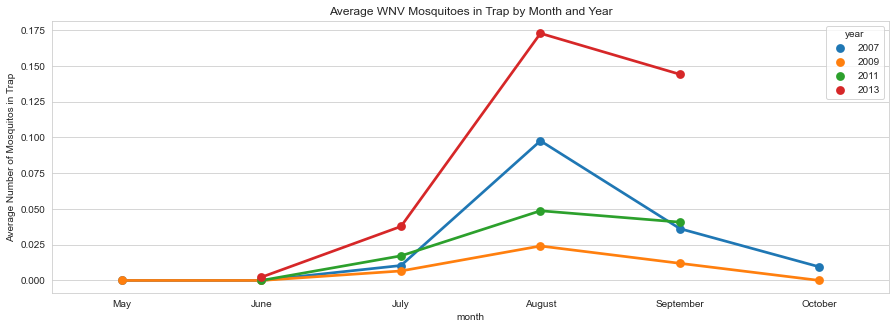

In [60]:
# plot Average WNV Mosquitoes in Trap by Month and Year
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="wnvpresent", hue="year", data=train.groupby(['year', 'month'], as_index=False)['wnvpresent'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
plt.title('Average WNV Mosquitoes in Trap by Month and Year');

In [61]:
# number of traps set by year
train.groupby('year')['trap'].count()

year
2007    3811
2009    2249
2011    2054
2013    2392
Name: trap, dtype: int64

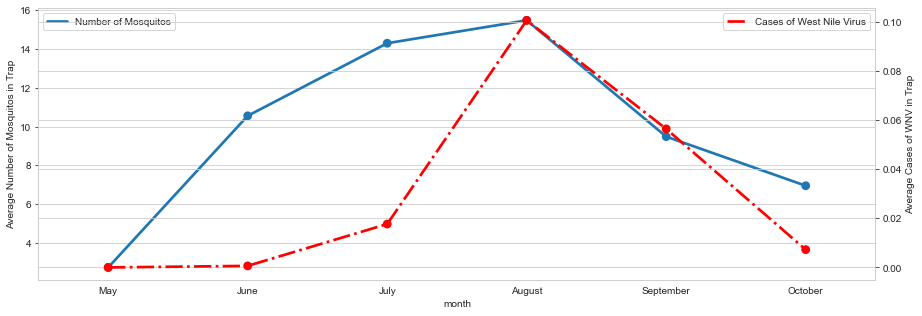

In [62]:
# sns.set(font_scale=0.8)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='month', y="nummosquitos", data=train.groupby(['month'], as_index=False)['nummosquitos'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
plt.legend(['Number of Mosquitos'], loc=2)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='month', y="wnvpresent", linestyles='-.', color='r', data=train.groupby(['month'], as_index=False)['wnvpresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')
plt.legend(['Cases of West Nile Virus'], loc=1);

<div class="alert alert-block alert-info">

<b>Feature Engineered:</b>
- "year", "month": Split date column into month and year column
- "total_mos": to combine multiple entries from nummosquitos that was above 50
- "rate_virus": 


<b>Observations:</b>

- There are a total of 7 species with culiex pipiens/restuans being the highest number of mosquito observation and the highest number of observation that is with WNV
- Majority class of WNV is not present.
- There is an unbalance distribution of target (Presence of WNV) in train datasets. Hence will have to stratify our target variable while doing train-test-split.
- With WnvPresent==0, there is quite a number of outliers
- Number of  mosquito fluctuates over the years but mosquito with wnv peaks in July and August but much more prevalent in 2007 & 2013.

</div>

***

## <span style='background :yellow' >2.2 Weather Dataset</span>

In [63]:
weather.head().T

,0,1,2,3,4
date,2007-05-01 00:00:00,2007-05-02 00:00:00,2007-05-03 00:00:00,2007-05-04 00:00:00,2007-05-05 00:00:00
tmax_1,83,59,66,66,66
tmin_1,50,42,46,49,53
tavg_1,67,51,56,58,60
dewpoint_1,51,42,40,41,38
wetbulb_1,56,47,48,50,49
preciptotal_1,0,0,0,0.005,0.005
stnpressure_1,29.1,29.38,29.39,29.31,29.4
sealevel_1,29.82,30.09,30.12,30.05,30.1
resultspeed_1,1.7,13,11.7,10.4,11.7


In [64]:
weather['tempmax_avg'] = (weather['tmax_1'] + weather['tmax_2'])/2
weather['tempmin_avg'] = (weather['tmin_1'] + weather['tmin_2'])/2
weather['temp_avg'] = (weather['tavg_1'] + weather['tavg_2'])/2
weather['dewpoint_avg'] = (weather['dewpoint_1'] + weather['dewpoint_2'])/2
weather['wetbulb_avg'] = (weather['wetbulb_1'] + weather['wetbulb_2'])/2
weather['precip_avg'] = (weather['preciptotal_1'] + weather['preciptotal_2'])/2
weather['stnpressure_avg'] = (weather['stnpressure_1'] + weather['stnpressure_2'])/2

In [65]:

weather['maxtemp_2w'] = weather['tempmax_avg'].rolling(14, min_periods=1).min()
weather['maxtemp_4w'] = weather['tempmax_avg'].rolling(28, min_periods=1).min()
weather['maxtemp_90d'] = weather['tempmax_avg'].rolling(90, min_periods=1).mean()

weather['mintemp_2w'] = weather['tempmin_avg'].rolling(14, min_periods=1).min()
weather['mintemp_4w'] = weather['tempmin_avg'].rolling(28, min_periods=1).min()
weather['mintemp_90d'] = weather['tempmin_avg'].rolling(90, min_periods=1).mean()

weather['tavg_2w'] = weather['temp_avg'].rolling(14, min_periods=1).mean()
weather['tavg_4w'] = weather['temp_avg'].rolling(28, min_periods=1).mean()
weather['tavg_90d'] = weather['temp_avg'].rolling(90, min_periods=1).mean()

weather['dew_2w'] = weather['dewpoint_avg'].rolling(14, min_periods=1).mean()
weather['dew_4w'] = weather['dewpoint_avg'].rolling(28, min_periods=1).mean()
weather['dew_90d'] = weather['dewpoint_avg'].rolling(90, min_periods=1).sum()

weather['wetbulb_2w'] = weather['wetbulb_avg'].rolling(14, min_periods=1).mean()
weather['wetbulb_4w'] = weather['wetbulb_avg'].rolling(28, min_periods=1).mean()
weather['wetbulb_90d'] = weather['wetbulb_avg'].rolling(90, min_periods=1).sum()

weather['precip_2w'] = weather['precip_avg'].rolling(14, min_periods=1).sum()
weather['precip_4w'] = weather['precip_avg'].rolling(28, min_periods=1).sum()
weather['precip_90d'] = weather['precip_avg'].rolling(90, min_periods=1).sum()

In [66]:
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [67]:
train = pd.merge(train, weather, how='left', on=['date','month','year'])

In [68]:
# Get Dummies
train = pd.get_dummies(train, columns = ['species'])

train = pd.get_dummies(train, columns = ['trap'])

train = pd.get_dummies(train, columns = ['month'])

train = pd.get_dummies(train, columns = ['year'])

train.shape

(10506, 215)

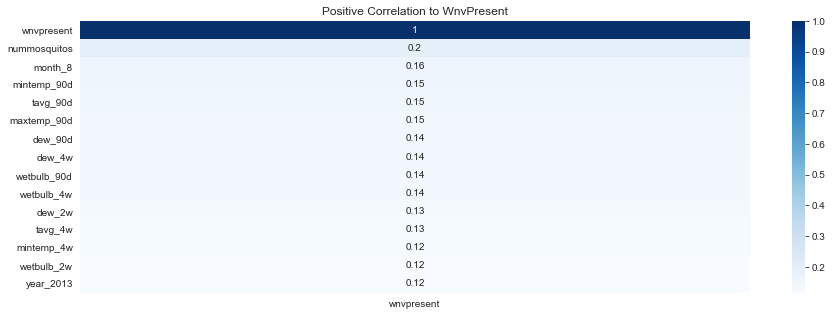

In [69]:
plt.figure(figsize = (15,5))
train_corr = train.corr()[['wnvpresent']].sort_values('wnvpresent', ascending=False)
positive_corr = train_corr.head(15)

sns.heatmap(positive_corr, annot = True, cmap='Blues')
plt.title('Positive Correlation to WnvPresent');

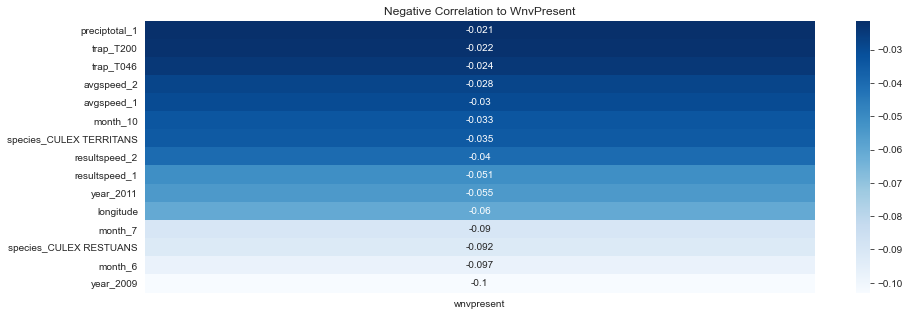

In [70]:
plt.figure(figsize = (15,5))
train_corr = train.corr()[['wnvpresent']].sort_values('wnvpresent', ascending=False)
negative_corr = train_corr.tail(15)

sns.heatmap(negative_corr, annot = True, cmap='Blues')
plt.title('Negative Correlation to WnvPresent');

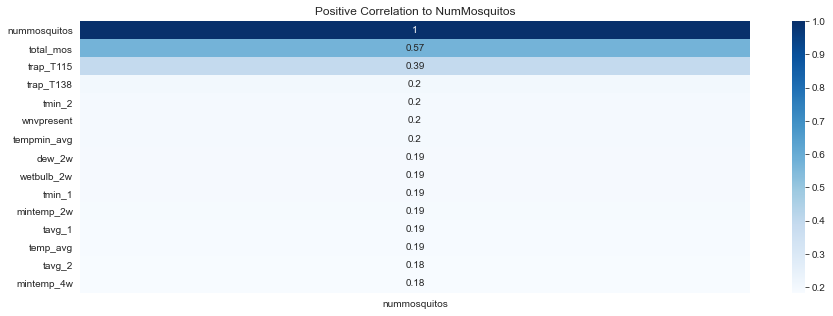

In [71]:
plt.figure(figsize = (15,5))
train_corr = train.corr()[['nummosquitos']].sort_values('nummosquitos', ascending=False)
positive_corr = train_corr.head(15)

sns.heatmap(positive_corr, annot = True, cmap='Blues')
plt.title('Positive Correlation to NumMosquitos');

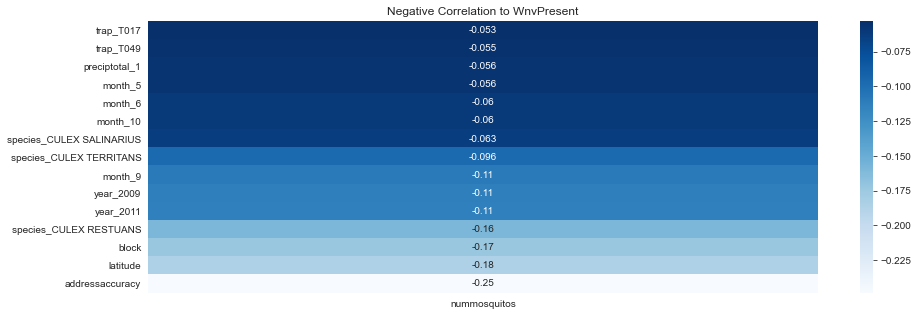

In [72]:
plt.figure(figsize = (15,5))
train_corr = train.corr()[['nummosquitos']].sort_values('nummosquitos', ascending=False)
negative_corr = train_corr.tail(15)

sns.heatmap(negative_corr, annot = True, cmap='Blues')
plt.title('Negative Correlation to WnvPresent');

In [73]:
# Save Merged DataFrame
train.to_csv("../assets/train_weather.csv")

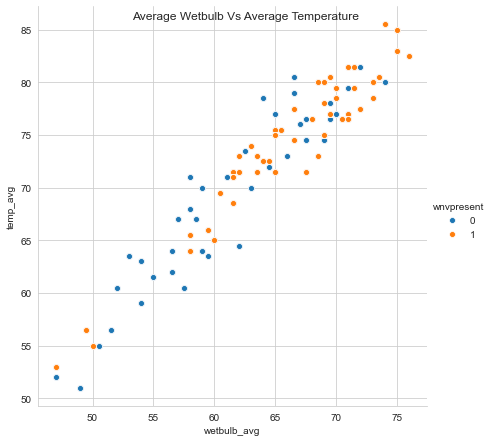

In [74]:
sns.pairplot(data=train, 
             x_vars='wetbulb_avg', 
             y_vars='temp_avg', 
             hue='wnvpresent', 
             size=6).fig.suptitle("Average Wetbulb Vs Average Temperature");

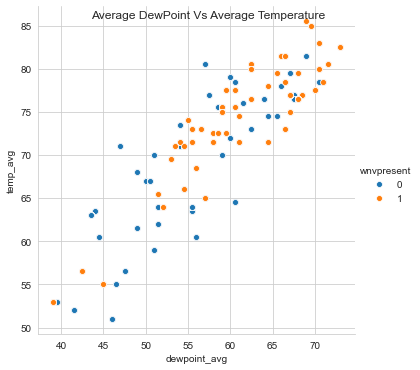

In [75]:
sns.pairplot(data=train, 
             x_vars='dewpoint_avg', 
             y_vars='temp_avg', 
             hue='wnvpresent', 
             size=5).fig.suptitle("Average DewPoint Vs Average Temperature");

More Mosquitos with West Nile Virus are detected during days with hotter temperatures

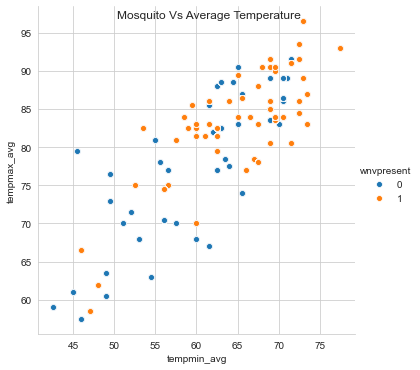

In [76]:
sns.pairplot(data=train, 
             x_vars='tempmin_avg', 
             y_vars='tempmax_avg', 
             hue='wnvpresent', 
             size=5).fig.suptitle("Mosquito Vs Average Temperature");

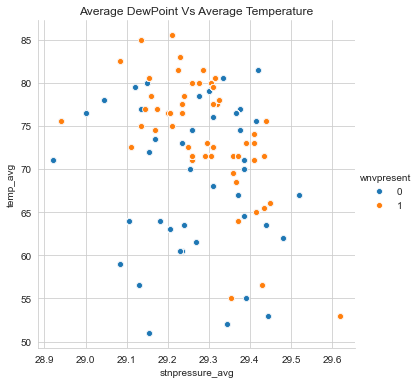

In [77]:
sns.pairplot(data=train, 
             x_vars='stnpressure_avg', 
             y_vars='temp_avg', 
             hue='wnvpresent', 
             size=5)
plt.title("Average DewPoint Vs Average Temperature");

<div class="alert alert-block alert-info">

<b>Feature Engineered:</b>
- Average of station 1 and 2 for columns and the average for 14, 28 and 90 days
    - "maxtemp",
    - "mintemp",
    - "tempavg",
    - "dewpoint",
    - "wetbulb",
    - "precip",
    - "stnpressure"
 
<b>Get dummy columns:</b>
- species
- trap


<b>Observations:</b>
- There's a positive correlation between average temperature, dewPoint and presence of WNV at both station 1 and 2.
- More Mosquitos with WNV are detected during days with hotter temperatures
- Presence of WNV is evident when Average Temperature is above 70 Degrees Fahrenheit and DewPoint is above 55 Degrees Fahrenheit, hence more mosquito with WNV during days with higher humidity

</div>

<div class="alert alert-block alert-warning">

<b>Question:</b>

- also whether to include length of day, if yes then we need to remove the drop from sunset sunrise, but i am okay to leave it as it is as well.
</div>

In [ ]:
# # function for how long a day is in minutes
# def day_length(row):
#     sunset = (round(row.Sunset / 100) * 60)
#     sunrise = (round(row.Sunrise / 100) * 60)
#     return int(abs(sunset - sunrise))


# # apply the function
# train['day_length'] = train.apply(day_length, axis=1)

****

## <span style='background :yellow' > 2.3 Spray Dataset</span>


In [78]:
spray.head()

,date,time,latitude,longitude,year,month
0,2011-08-29,18.0,42.391623,-88.089163,2011,8
1,2011-08-29,18.0,42.391348,-88.089163,2011,8
2,2011-08-29,18.0,42.391022,-88.089157,2011,8
3,2011-08-29,18.0,42.390637,-88.089158,2011,8
4,2011-08-29,18.0,42.390410,-88.088858,2011,8


In [79]:
print(spray["date"].nunique())
spray["date"].value_counts()

10


2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

<div class="alert alert-block alert-info">
<b>Observations:</b>
There were a total of 10 unique sprays dates which occur in both 2011 and 2013. 
On top of that we could see the total number of sprays made on those unique date. Hence we shall look at the location of these spray in this two years
</div>

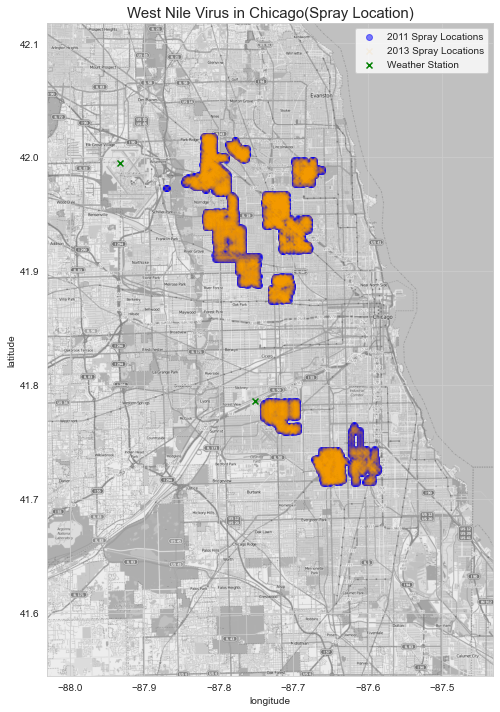

In [80]:
spray_2011 = spray[spray['year'] == 2011]
spray_2013 = spray[spray['year'] == 2013]

# use map data provided by kaggle
mapdata = np.loadtxt('../assets/mapdata_copyright_openstreetmap_contributors.txt')  
lon_lat_box = (train['longitude'].min()-.1, 
               train['longitude'].max()+.1, 
               train['latitude'].min()-.1, 
               train['latitude'].max()+.1)

# Plot map
fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box) 

# Spray locations
sprays = spray[['longitude', 'latitude']]
sprays_2011 = spray_2011[['longitude', 'latitude']]
sprays_2013 = spray_2013[['longitude', 'latitude']]
sprays_2011 = sprays[sprays['latitude'] < 42.3]  #outliers excluded
sprays_2013 = sprays[sprays['latitude'] < 42.3] 

plt.scatter(sprays_2011['longitude'], 
            sprays_2011['latitude'], 
            marker='o', 
            color='blue',
            alpha=.5, 
            label='2011 Spray Locations')

plt.scatter(sprays_2013['longitude'], 
            sprays_2013['latitude'], 
            marker='x', 
            color='orange',
            alpha=.08, 
            label='2013 Spray Locations')

# Weather stations
plt.scatter(x = (-87.933, -87.752), 
            y = (41.995, 41.786), 
            marker='x', 
            color='g', 
            label='Weather Station')

plt.title('West Nile Virus in Chicago(Spray Location)', size=15)
plt.legend(frameon=1)
plt.xlabel('longitude')
plt.ylabel('latitude');

<div class="alert alert-block alert-info">
<b>Observations:</b>
Sprayed location of 2011 and 2013 showed minimal or no change.

</div>

In [81]:
from sklearn.neighbors import KernelDensity

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sigthings = train[train['wnvpresent'] == 1]
sigthings = sigthings.groupby(['date', 'trap','longitude', 'latitude']).max()['wnvpresent'].reset_index()
X = sigthings[['longitude', 'latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sigthings[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x', label='Trap Location')


plt.title('West Nile Virus in Chicago (density and clustering of traps)',size=15)
plt.legend(frameon=1)
plt.xlabel('longitude')
plt.ylabel('latitude');


KeyError: 'trap'

<div class="alert alert-block alert-info">
<b>Observations:</b>
This identify the density traps with mosquitos with WNV. Darker red areas indicates more mosquitoes with the virus and lighter red indicates less mosquito with the virus. Hence, darker read areas tend to have more priority.
</div>

<div class="alert alert-block alert-info">
Since the spraying occurs based on distance, DBSCAN seems the most appropriate as it does really well when there is clear "separation" within the dataset. Also as data uses coordinates for this clustering they should be of the same scale hence, no scaling should be required here.

</div>

Silhouette Score: 0.4937448338684894
Number of outliers: 5 (0.03% of samples)
Number of clusters: 8


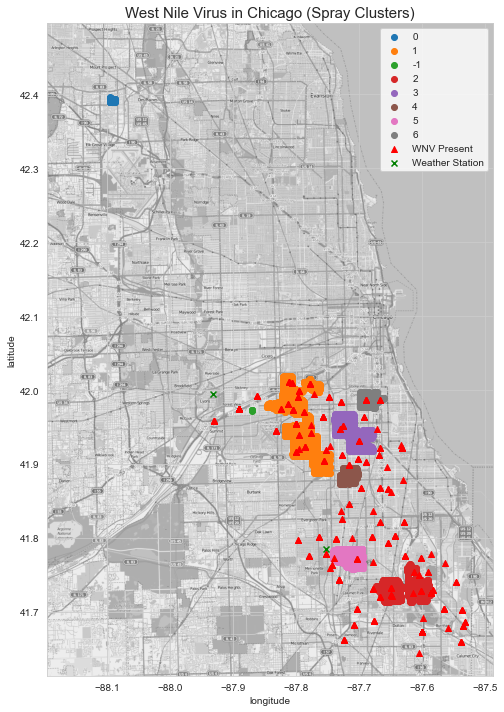

In [82]:
#use DBSCAN to cluster spray data to use to create spray cluster feature

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# isolate the coordinates
X_spray = spray[['latitude', 'longitude']] 

minmax = MinMaxScaler(feature_range = (0, 1))
clusters = minmax.fit_transform(X_spray)

# run DBSCAN (parameters set after multiple iterations)
dbscan = DBSCAN(eps=.01, min_samples=20).fit(X_spray) 
# assign the clusters to original DataFrame.
X_spray['cluster'] = dbscan.labels_ 
vals = X_spray['cluster'].value_counts()

print(f'Silhouette Score: {silhouette_score(clusters, dbscan.labels_)}')
print(f'Number of outliers: {vals[-1]} ({vals[-1] * 100 / len(X_spray):.2f}% of samples)')
print(f'Number of clusters: {len(vals)}')

# set dimensions of plot
lon_lat_box_spray = (X_spray['longitude'].min()-.1, X_spray['longitude'].max()+.1, 
                     X_spray['latitude'].min()-.1,X_spray['latitude'].max()+.1)

# create plot of spray clusters, for loop allows for legend to represent clusters 
fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box_spray) 

# iterate through each cluster value and plot points in the same figure (maintains lables)
for i in X_spray['cluster'].unique():  
    ax.scatter(X_spray[X_spray['cluster'] == i]['longitude'], 
               X_spray[X_spray['cluster'] == i]['latitude'], 
               label=i, marker='o')

# WNV presence
plt.scatter(train[train['wnvpresent'] == 1]['longitude'], 
            train[train['wnvpresent'] == 1]['latitude'], 
            marker='^', label='WNV Present', color='r')

# Weather stations
# Station 1: Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
plt.scatter(x = (-87.933, -87.752), 
            y = (41.995, 41.786), 
            marker='x', 
            color='g', 
            label='Weather Station')

plt.legend(frameon=1)
plt.title('West Nile Virus in Chicago (Spray Clusters)', size=15)
plt.xlabel('longitude')
plt.ylabel('latitude');

<div class="alert alert-block alert-info">
<b>Observations:</b>
The spray cluster graph shows the number of possible clusters where spray occured, with a silhouette score of 0.49 (the closer the score is to 1 the better the clusters are well separated.) 
However there is one cluster that is way out of the norm that could be the outliers.

</div>

Silhouette Score: 0.4937448338684894


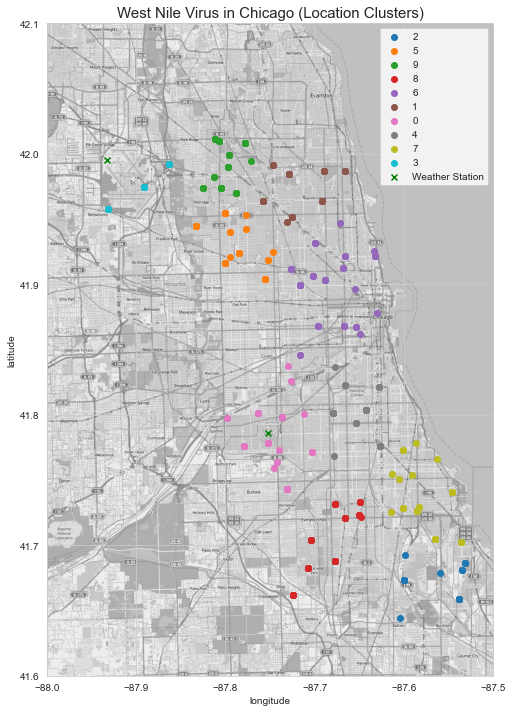

In [83]:
from sklearn.cluster import KMeans

# isolate positive WNV traps
X_clusters = train[train['wnvpresent'] == 1][['latitude', 'longitude']] 

# create clustering model with KMeans
# 10 clusters selected after a few iterations and reviewing plot below
km = KMeans(n_clusters=10).fit(X_clusters) 
# assign the clusters to original DataFrame.
X_clusters['cluster'] = km.labels_ 

print(f'Silhouette Score: {silhouette_score(clusters, dbscan.labels_)}')

# plot map
fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), aspect='auto', extent=lon_lat_box) 
# iterate through each cluster value and plot points in the same figure (maintains lables)
for i in X_clusters['cluster'].unique(): 
    ax.scatter(X_clusters[X_clusters['cluster'] == i]['longitude'], 
               X_clusters[X_clusters['cluster'] == i]['latitude'], 
               label=i, marker='o')
    
plt.scatter(x = (-87.933, -87.752), 
            y = (41.995, 41.786), 
            marker='x', 
            color='g', 
            label='Weather Station')
    
plt.legend(frameon=1)
plt.title('West Nile Virus in Chicago (Location Clusters)', size=15)
plt.xlabel('longitude')
plt.ylabel('latitude');

<div class="alert alert-block alert-warning">

<b>Question:</b>
Not sure what information can i get out of this. Would be great if you guys know, or else should i just remove?
</div>

<div class="alert alert-block alert-warning">
@Graham Other repos you might find helpful 
<br>    
    
https://github.com/saqibnizami/DSI-Project-4/blob/master/P4_SprayEffectiveness.ipynb (Where codes below comes from)
<br>

https://github.com/zzeniale/West-Nile-Virus-prediction/blob/master/code/2_model_tuning_and_insights.ipynb 
(more pipeline and ROC AUC function!)
</div>

## <span style='background :yellow' > 4. Modelling </span>

In [ ]:
# Baseline accuracy
train["wnvpresent"].value_counts(normalize=True)

### <span style='background :yellow' > 4.1 Model Prep </span>

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split

In [ ]:
# Create X and y variables
feature = 
X = 
y = 

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

### <span style='background :yellow' > 4.2 GridSearch</span>

#### @Graham found this in one of the repo, might find this helpful
https://github.com/nicholas-limjj/dsi-project4/blob/master/code/Project%204%20Notebook.ipynb

In [ ]:
# model_dict = {
#     'ss': StandardScaler(),
#     'lr': LogisticRegression(solver='lbfgs'),
#     'nb': MultinomialNB(),
#     'knn': KNeighborsClassifier(),
#     'dt': DecisionTreeClassifier(),
#     'rf': RandomForestClassifier(random_state=42),
#     'et': ExtraTreesClassifier(),
#     'ada_dt': AdaBoostClassifier(random_state=42),
#     'ada_rf': AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),random_state=42),
#     'gboost': GradientBoostingClassifier()
# }

# model_full = {
#     'ss': 'Standard Scaler',
#     'lr': 'Logistic Regression',
#     'knn': 'KNearestNeighbor',
#     'nb': 'Multinomial NB',
#     'dt': 'Decision Tree',
#     'rf': 'Random Forest',
#     'et': 'Extra Tree',
#     'ada_dt': 'AdaBoost - Decision Tree',
#     'ada_rf': 'AdaBoost - Random Forest',
#     'gboost': 'Gradient Boosting Classifier'
# }

# param_dict = {    
#     'knn': {
#         'knn__n_neighbors': [2,3,4,5]
#     },
#     'lr': {
#         'lr__max_iter': [100,200]
#     },
#     'nb': {},
#     'dt': {
#         'dt__max_depth': [5,7],
#         'dt__min_samples_split': [10,15],
#         'dt__min_samples_leaf': [3,4]
#     },
#     'rf': {
#         'rf__n_estimators': [500,1000,2000],
#         'rf__min_samples_split': [2,3],
#         'rf__max_depth': [2,3],
#         'rf__min_samples_leaf': [3,4]
        
#     },
#     'et': {
#         'et__n_estimators': [1000,2000],
#         'et__min_samples_split': [2,3],
#     },
#     'ada_dt': {
#         'ada_dt__n_estimators': [50,100,200],
#         'ada_dt__learning_rate': [0.9, 1]
#     },
#     'ada_rf': {
#         'ada_rf__n_estimators': [50,100,200],
#         'ada_rf__learning_rate': [0.9, 1],
#         'ada_rf__base_estimator__max_depth': [3], 
#         'ada_rf__base_estimator__min_samples_leaf': [4], 
#         'ada_rf__base_estimator__min_samples_split': [2], 
#         'ada_rf__base_estimator__n_estimators': [1000]
#     },
#     'gboost': {
#         'gboost__n_estimators': [50,100],
#         'gboost__max_depth': [2,3,4],
#         'gboost__learning_rate': [0.1, 0.5, 1]
#     }
# }

# def prepare_pipeline(list_of_models):
#     """
#     Prepare pipeline of models to be used for modelling
    
#     Parameters
#     ----------
#     list_of_models: list[str]
#         List of models to be included for pipeline
    
#     Returns
#     -------
#     Pipeline
#         Pipeline of models to be run
#     """
#     pipe_list = [(i,model_dict[i]) for i in list_of_models]
#     return Pipeline(pipe_list)

# def add_params(name,pipe_dict):
#     """
#     Add parameters for GridSearch
    
#     Parameters
#     ----------
#     name: str
#         Name of model/vectorization method to have params added.
#     pipe_dict: Dictionary
#         Dictionary that contains parameters to be added into GridSearch
    
#     Returns
#     -------
#     Dictionary
#         Dictionary that contains parameters to be added for GridSearch
#     """
#     params = param_dict[name]
#     for k,v in params.items():
#         pipe_dict[k] = v
#     return pipe_dict

# def grid_search(model,train_data=X,train_target=y):
#     """
#     Initialize and run GridSearch
    
#     Parameters
#     ----------
#     model: str
#         Initialize which classification model to use. Note classification model has to be contained in model_dict.
        
#     train_data: list[str]
#         List of training data to be used
    
#     Returns
#     -------
#     List
#         List that contains predicted values of the test data
#     """
#     X_train, X_test, y_train,y_test = train_test_split(train_data,train_target,test_size=0.25,stratify=train_target,random_state=42)
#     pipe_params = {}
#     pipe_params = add_params(model,pipe_params)
#     pipe = prepare_pipeline(['ss',model])
#     gs = GridSearchCV(pipe,param_grid=pipe_params,cv=3,n_jobs=-1,scoring='roc_auc')
#     gs.fit(X_train,y_train)
#     print(f'Using {model_full[model]}:')
#     print(f'Train Score: {round(gs.best_score_,4)}')
#     print(f'Test Score: {round(gs.score(X_test,y_test),4)}')
#     print(f'Using the following parameters: {gs.best_params_}')
    
#     #return {'gs':gs, 'data': {'X_test' : X_test , 'y_test':y_test} } ---- might not need this as return

In [ ]:
# grid_search('lr')
# grid_search('knn')
# grid_search('dt')
# grid_search('rf')
# grid_search('ada_dt')
# grid_search('ada_rf')
# grid_search('gboost')

## <span style='background :yellow' >5. Model Evaluation</span>
ROC AUC Function from workbook (which i used in project 3)

In [ ]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

In [ ]:
# plt.figure(figsize = (15,10))

# thresholds = np.linspace(0, 1, 200)

# # Sensitivity: True positive rate
# def TPR(df, true_col, pred_prob_col, threshold):
#     true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
#     false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
#     return true_positive / (true_positive + false_negative)
    

# # 1 - specificity: False positive rate
# def FPR(df, true_col, pred_prob_col, threshold):
#     true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
#     false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
#     return 1 - (true_negative / (true_negative + false_positive))
    
# # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
# tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]


# plt.plot(fpr_values,
#          tpr_values,
#          label='ROC Curve')

# # Basline
# plt.plot(np.linspace(0, 1, 200),
#          np.linspace(0, 1, 200),
#          label='baseline',
#          linestyle='--')

# plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', 
#           fontsize=22)
# plt.ylabel('Sensitivity', fontsize=18)
# plt.xlabel('1 - Specificity', fontsize=18)

# plt.legend(fontsize=16);

<div class="alert alert-block alert-info">

The closer the ROC AUC is to 1, the better the model.

</div>

## after this point: full pasting of data from 
https://github.com/dale-wahl/West-Nile-Virus/blob/master/EDA-West%20Nile%20Virus%20-%20Dale.ipynb

In [ ]:
final_df = pd.get_dummies(train, columns=['Species'])

In [ ]:
#our two origins (the locations with the most WNV activity) are Chicago O'Hare and Doty Ave.
#the following values are their latitudes and longitudes
ohare_lon = -87.890615
ohare_lat = 41.974689
doty_lon =-87.599862
doty_lat=41.673408

In [ ]:
lat = train.Latitude
lon = train.Longitude


In [ ]:

#haversine takes two lat and longs and creates a distance, from the mean, in miles
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    mi = 3956   * c #Radius of earth in miles. Use 6367 for kilometers
    return mi, dlon, dlat

In [ ]:

#apply haversine function to training dataset, creating a column called 'dist_from_ohare_MI'
final_df['dist_from_ohare_MI'] = [haversine(y, x, ohare_lon, ohare_lat)[0] for y, x in zip(lon, lat)]
#apply haversine function to training dataset, creating a column called 'dist_from_doty_MI'
final_df['dist_from_doty_MI'] = [haversine(y, x, doty_lon, doty_lat)[0] for y, x in zip(lon, lat)]

In [ ]:
# Get a lat and long for each trap
trap_locs = train.groupby(['trap'], as_index=False)['latitude', 'longitude'].mean().dropna().reset_index().drop('index', 1)

In [ ]:
trap_locs.head()

In [ ]:
trap_name = np.array(trap_locs.trap)
trap_lat = np.array(trap_locs.latitude)
trap_lon = np.array(trap_locs.longitude)

In [ ]:
# this should go through each trap and check to see if the spray truck is close
def check_traps(row):
    distance = [haversine(lon1=row['longitude'], lat1=row['Latitude'], lon2=trap_lon[i], lat2=trap_lat[i])[0] for i in range(len(trap_name))]
    for a, b in enumerate(distance):
        if b < 1:
            spray.set_value(row.name,trap_name[a],1)
            break 
        else:
            spray.set_value(row.name,trap_name[a],0)

In [ ]:
# create groupby on days and note if the truck was within a mile
spray_days = spray.groupby('Date', as_index=False)[trap_name].max()

In [ ]:
spray.Date.unique()

In [ ]:
spray_days

In [ ]:
from datetime import timedelta
spray_weeks = []
for i in spray.Date.unique():
    spray_weeks.append([pd.to_datetime(i) + timedelta(days=a) for a in range(1,15)])

In [ ]:
final_df[final_df['Date']=='2011-09-01'].head()

In [ ]:

final_df['sprayed_14days'] = 0
def spray_truck(row):
    for num, i in enumerate(spray_weeks):
        if row['Date'] not in i:
            continue
        else:
            if spray_days.iloc[num][row['Trap']] == 1:
                return 1
            else:
                continue

In [ ]:

final_df['sprayed_14days'] = final_df.apply(spray_truck, axis=1)

In [ ]:
final_df['sprayed_14days'] = final_df['sprayed_14days'].fillna(0)
final_df['sprayed_14days'].value_counts()

In [ ]:
#Spray was not a good predictor for WNV, but maybe mosquitoes?

In [ ]:
# These are the days we're looking at:
spray.Date.unique()

In [ ]:

mosquitoes = train.groupby(['Date', 'Trap'], as_index=False)['NumMosquitos'].sum().dropna()

In [ ]:
mosquitoes['sprayed_14days'] = mosquitoes.apply(spray_truck, axis=1).fillna(0)

In [ ]:
# These two traps were sprayed in 2011
mosquitoes[(mosquitoes['Date'] > '2011') & (mosquitoes['Date'] < '2012') & (mosquitoes['sprayed_14days']==1)]
# T002 & T233

In [ ]:
mosquitoes2011 = mosquitoes[(mosquitoes['Date'] > '2011') & (mosquitoes['Date'] < '2012')]

In [ ]:
# Averages in all other traps; unfortunately it is hard to compare one trap to another
mosquitoes2011[(mosquitoes2011['Trap'] != 'T002') | (mosquitoes2011['Trap'] != 'T233')].groupby('Date')['NumMosquitos'].mean()

In [ ]:

#Averages of the two sprayed traps
mosquitoes2011[(mosquitoes2011['Trap'] == 'T002') | (mosquitoes2011['Trap'] == 'T233')].groupby('Date')['NumMosquitos'].mean()

In [ ]:

mosquitoes[(mosquitoes['Date'] > '2011') & (mosquitoes['Date'] < '2012') & (mosquitoes['Trap']=='T223')]

In [ ]:
#traps spreadyed in 2013
sprayed_2013=list(mosquitoes[(mosquitoes['Date'] > '2013') & (mosquitoes['Date'] < '2014') & (mosquitoes['sprayed_14days']==1)]['Trap'].unique())

In [ ]:
mosquitoes2013 = mosquitoes[(mosquitoes['Date'] > '2013') & (mosquitoes['Date'] < '2014')]

In [ ]:

spray.Date.unique()[2:]

In [ ]:
unsprayed_traps_2013 = mosquitoes2013[mosquitoes2013['Trap'].isin(sprayed_2013)].groupby('Date')['NumMosquitos'].mean()
unsprayed_traps_2013

In [ ]:
sprayed_traps_2013 = mosquitoes2013[~mosquitoes2013['Trap'].isin(sprayed_2013)].groupby('Date')['NumMosquitos'].mean()
sprayed_traps_2013

In [ ]:
after_sprays = unsprayed_traps_2013.copy()
for i in range(len(after_sprays)):
    after_sprays[i]=0
after_sprays[7] = 50
after_sprays[8] = 50
after_sprays[10] = 50
after_sprays[12] = 50
after_sprays[13] = 50
after_sprays[14] = 50

In [ ]:
after_sprays[[7,8,10,12,13,14]]

In [ ]:
fig, ax = plt.subplots()
import matplotlib.lines as mlines
sns.pointplot(unsprayed_traps_2013.index, unsprayed_traps_2013.values, color='blue')
sns.pointplot(sprayed_traps_2013.index, sprayed_traps_2013.values, color='r')
sns.pointplot(after_sprays.index, after_sprays.values, linestyles='', color='black')

plt.xticks(rotation=45)
blue_line = mlines.Line2D([],[],color='blue', label='Unsprayed Traps')
red_line = mlines.Line2D([],[],color='red', label='Sprayed Traps')
black_line = mlines.Line2D([],[],color='black', label='Spray Days')
plt.ylabel('Average Mosquitos in Trap')
plt.legend(handles=[blue_line, red_line, black_line])

In [ ]:
print(list(final_df.columns))

## Test Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df_train, df_test = train_test_split(final_df.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'NumMosquitos', 'st1_CodeSum', 'st2_CodeSum'], 1), test_size=0.3, random_state=42)

In [ ]:
test_features = final_df[['sprayed_14days', 'Latitude', 'Longitude', 'WnvPresent', 'st1_Tmax', 'st1_Tmin', 'st1_Tavg', 'st1_DewPoint', 'st1_WetBulb', 'st1_SnowFall', 'st1_PrecipTotal', 'st1_StnPressure', 'st1_SeaLevel', 'st1_ResultSpeed', 'st1_ResultDir', 'st1_AvgSpeed', 'st2_Tmax', 'st2_Tmin', 'st2_Tavg', 'st2_DewPoint', 'st2_WetBulb', 'st2_SnowFall', 'st2_PrecipTotal', 'st2_StnPressure', 'st2_SeaLevel', 'st2_ResultSpeed', 'st2_ResultDir', 'st2_AvgSpeed', 'precip_avg', '2wk_precip', '4wk_precip', '90day_precip', 'temp_avg', '2wk_tavg', '4wk_tavg', '90day_tavg', 'tempmin_avg', '2wk_mintemp', '4wk_mintemp', 'dew_avg', '2wk_dew', '4wk_dew', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Month', 'Day', 'dist_from_ohare_MI', 'dist_from_doty_MI']]

In [ ]:

df_train, df_test = train_test_split(test_features, test_size=0.3, random_state=42)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)

    print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
    print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ', cnf_matrix[1, 1], '\n')

    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])

    print('Sensitivity (TP/ TP + FN): ', sensitivity)
    print('Specificity (TN/ TN + FP): ', specificity, '\n')

    print('Accuracy: ', accuracy_score(y_true, predictions, normalize=True))
    print('Precision: ', precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
df_train.WnvPresent.value_counts()

In [ ]:

xgb = XGBClassifier(scale_pos_weight=(6969/385), objective='binary:logistic')
# make sure to pick the correct objective for the problem
# scale_pos_weight is supposed to help with unbalanced classes; it recommended number of negative cases divided by positive
xgb.fit(df_train.drop('WnvPresent', 1), df_train.WnvPresent)

In [ ]:
test_predictions = xgb.predict(df_test.drop('WnvPresent', 1))
eval_sklearn_model(df_test.WnvPresent, test_predictions)

In [ ]:
feature_import = xgb.feature_importances_

In [ ]:

features = df_test.drop('WnvPresent', 1).columns

In [ ]:
pd.set_option('display.max_rows',60)

In [ ]:
pd.DataFrame(columns=['feature', 'import'], data=list(zip(features, feature_import))).sort_values('import',ascending=False)

In [ ]:

# Run on full data
final_df.WnvPresent.value_counts()

In [ ]:

xgb = XGBClassifier(scale_pos_weight=(9955/551), objective='binary:logistic')
xgb.fit(test_features.drop('WnvPresent', 1), test_features.WnvPresent)

## Prep test

In [ ]:
test["Date"] = pd.to_datetime(test["Date"], infer_datetime_format=True)

In [ ]:
test['Address'] = test['Address'].astype('category')
test['Species'] = test['Species'].astype('category')
test['Street'] = test['Street'].astype('category')
test['Trap'] = test['Trap'].astype('category')
test['AddressNumberAndStreet'] = test['AddressNumberAndStreet'].astype('category')

In [ ]:

test = pd.merge(test, weather, how='left', on='Date')

In [ ]:

test = pd.get_dummies(test, columns=['Species'])

In [ ]:
test['Month'] = test['Date'].dt.month
test["Day"] = test['Date'].dt.dayofyear

In [ ]:
lat = test.Latitude
lon = test.Longitude

In [ ]:
#apply haversine function to training dataset, creating a column called 'dist_from_ohare_MI'
test['dist_from_ohare_MI'] = [haversine(y, x, ohare_lon, ohare_lat)[0] for y, x in zip(lon, lat)]
#apply haversine function to training dataset, creating a column called 'dist_from_doty_MI'
test['dist_from_doty_MI'] = [haversine(y, x, doty_lon, doty_lat)[0] for y, x in zip(lon, lat)]

In [ ]:
#predictions = xgb.predict(test.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'st1_CodeSum', 'st2_CodeSum'], 1))
# ValueError: test data apparently has more damn columns!

In [ ]:
test.drop(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'st1_CodeSum', 'st2_CodeSum'], 1).shape
# 6 more columns!

In [ ]:

for i in test.columns:
    if i in final_df.columns:
        pass
    else:
        print(i)

In [ ]:
pred_features = test[['Latitude', 'Longitude', 'st1_Tmax', 'st1_Tmin', 'st1_Tavg', 'st1_DewPoint', 'st1_WetBulb', 'st1_SnowFall', 'st1_PrecipTotal', 'st1_StnPressure', 'st1_SeaLevel', 'st1_ResultSpeed', 'st1_ResultDir', 'st1_AvgSpeed', 'st2_Tmax', 'st2_Tmin', 'st2_Tavg', 'st2_DewPoint', 'st2_WetBulb', 'st2_SnowFall', 'st2_PrecipTotal', 'st2_StnPressure', 'st2_SeaLevel', 'st2_ResultSpeed', 'st2_ResultDir', 'st2_AvgSpeed', 'precip_avg', '2wk_precip', '4wk_precip', '90day_precip', 'temp_avg', '2wk_tavg', '4wk_tavg', '90day_tavg', 'tempmin_avg', '2wk_mintemp', '4wk_mintemp', 'dew_avg', '2wk_dew', '4wk_dew', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Month', 'Day', 'dist_from_ohare_MI', 'dist_from_doty_MI']]

In [ ]:
# fuck it, drop them and sort it later!
predictions = xgb.predict(pred_features)

In [ ]:
submission = pd.DataFrame(columns=['Id', 'WnvPresent'], data=list(zip(test.Id, predictions)))